In [62]:
import numpy as np # Linear algebra library
import matplotlib.pyplot as plt # library for visualization
from sklearn.decomposition import PCA # PCA library
import pandas as pd # Data frame library
import math # Library for math functions
import random # Library for pseudo random numbers
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Component:
 [[-0.52651479  0.60121687 -0.60109937]
 [ 0.80892213  0.57182242 -0.13661665]] 

Variance:
 [0.37027112 0.33730529]


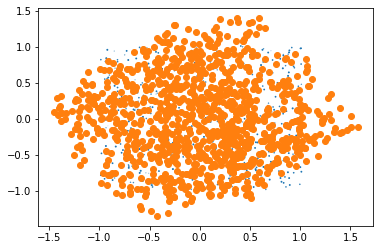

In [ ]:
n=1
x = np.random.uniform(1,3,1000)
y=np.random.uniform(1,3,1000)
z=np.random.uniform(1,3,1000)
#Centering the Data as PCA works better on it
x=x-np.mean(x)
y=y-np.mean(y)
z=z-np.mean(z)
#Creating Dataframes for x & y
data=pd.DataFrame({'x':x,'y':y,'z':z})
plt.scatter(data.x,data.y,data.z)
pca=PCA(n_components=2)
pcaTr=pca.fit(data)
rotatedData=pcaTr.transform(data)
print("Component:\n",pcaTr.components_,"\n")
print("Variance:\n",pcaTr.explained_variance_)
dataPCA=pd.DataFrame(data=rotatedData,columns=['PC1','PC3'])
plt.scatter(dataPCA.PC1,dataPCA.PC3)
plt.show()

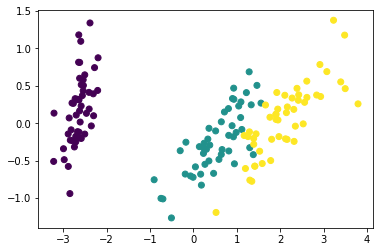

In [ ]:
#TASK 2
iris=datasets.load_iris()
X=iris.data
y=iris.target

X.shape
y.shape
#Reducing the dimensions from 4->2 
pca=PCA(n_components=2)
pca.fit(X)
pca.components_
Z=pca.transform(X)
Z.shape
plt.scatter(Z[:,0],Z[:,1],c=y)
# Here the purple one is easy seperable from the other data pointsand also the blue and yellow is sperable


In [69]:
#TASK3 With PCA
dataset=pd.read_csv('https://raw.githubusercontent.com/MehtaUrjit/ML/main/iris.csv')
dataset.head()

X=dataset.drop('Species',1)
y=dataset['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca=PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

variance=pca.explained_variance_ratio_

pca=PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)
precision=precision_score(y_test,y_pred,pos_label='positive',average='micro')
print("Precision: ",precision)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Precision:  1.0
Accuracy:  100.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [68]:
#TASK3 With Naive Bayes
iris=datasets.load_iris()
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb=GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
precision=precision_score(y_test,y_pred,pos_label='positive',average='micro')
print("Precision: ",precision)
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

Precision:  0.9666666666666667
Accuracy:  96.66666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
